## VAE on GSE57872

In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.optimizers import RMSprop, Adam

from rna_autoencoder_test import VariationalAutoEncoder, random_projection

In [2]:
data = pd.read_csv('clean_data/GSE57872.txt', sep='\t', index_col=0)
X = data.T
print(X.shape)
m, n = X.shape

tumor_ids = X.index.map(lambda i: i.split('_')[0])
tumor_ids = LabelEncoder().fit_transform(tumor_ids)

(430, 5948)


In [3]:
X_scaled = MinMaxScaler().fit_transform(X)
X_train, X_test = train_test_split(X_scaled)

In [10]:
early_stopping = EarlyStopping(patience=50)
vae = VariationalAutoEncoder.build_vae(input_dim=n, 
                                       tau=1, 
                                       learning_rate=0.0001, 
                                       alpha=0.00001,
                                       zero_inflated=True,
                                       name='GSE57872')
vae.fit(X_train, X_train, 
        validation_data=(X_test, X_test),
        epochs=10000,
        batch_size=256,
        callbacks=[early_stopping])

Train on 322 samples, validate on 108 samples
Epoch 1/10000
322/322 [==============================] - 8s 26ms/sample - loss: 898.3126 - val_loss: 892.8332
Epoch 2/10000
322/322 [==============================] - 1s 4ms/sample - loss: 896.7692 - val_loss: 895.5334
Epoch 3/10000
322/322 [==============================] - 1s 3ms/sample - loss: 897.6386 - val_loss: 894.4125
Epoch 4/10000
322/322 [==============================] - 1s 4ms/sample - loss: 895.9931 - val_loss: 895.2861
Epoch 5/10000
322/322 [==============================] - 1s 3ms/sample - loss: 896.9335 - val_loss: 893.6605
Epoch 6/10000
322/322 [==============================] - 1s 3ms/sample - loss: 896.6260 - val_loss: 894.5373
Epoch 7/10000
322/322 [==============================] - 1s 4ms/sample - loss: 896.2938 - val_loss: 893.1427
Epoch 8/10000
322/322 [==============================] - 1s 3ms/sample - loss: 896.1424 - val_loss: 894.0175
Epoch 9/10000
322/322 [==============================] - 1s 4ms/sample - loss: 89

322/322 [==============================] - 1s 4ms/sample - loss: 775.1376 - val_loss: 775.9813
Epoch 76/10000
322/322 [==============================] - 1s 4ms/sample - loss: 774.8657 - val_loss: 776.6648
Epoch 77/10000
322/322 [==============================] - 1s 4ms/sample - loss: 773.6993 - val_loss: 775.4326
Epoch 78/10000
322/322 [==============================] - 1s 4ms/sample - loss: 773.6990 - val_loss: 774.1729
Epoch 79/10000
322/322 [==============================] - 1s 4ms/sample - loss: 771.9186 - val_loss: 774.5237
Epoch 80/10000
322/322 [==============================] - 1s 4ms/sample - loss: 772.2850 - val_loss: 775.4984
Epoch 81/10000
322/322 [==============================] - 1s 4ms/sample - loss: 772.3189 - val_loss: 775.7037
Epoch 82/10000
322/322 [==============================] - 1s 4ms/sample - loss: 771.1994 - val_loss: 775.0388
Epoch 83/10000
322/322 [==============================] - 1s 4ms/sample - loss: 770.9175 - val_loss: 775.0338
Epoch 84/10000
322/322 [=

Epoch 223/10000
322/322 [==============================] - 1s 4ms/sample - loss: 754.1082 - val_loss: 757.6751
Epoch 224/10000
322/322 [==============================] - 1s 4ms/sample - loss: 754.0911 - val_loss: 756.8932
Epoch 225/10000
322/322 [==============================] - 1s 4ms/sample - loss: 752.5445 - val_loss: 757.0807
Epoch 226/10000
322/322 [==============================] - 1s 4ms/sample - loss: 752.8472 - val_loss: 755.7032
Epoch 227/10000
322/322 [==============================] - 1s 4ms/sample - loss: 753.7631 - val_loss: 756.1264
Epoch 228/10000
322/322 [==============================] - 1s 4ms/sample - loss: 752.6344 - val_loss: 757.0474
Epoch 229/10000
322/322 [==============================] - 1s 4ms/sample - loss: 753.3215 - val_loss: 755.8748
Epoch 230/10000
322/322 [==============================] - 1s 3ms/sample - loss: 752.6918 - val_loss: 757.6124
Epoch 231/10000
322/322 [==============================] - 1s 3ms/sample - loss: 753.0027 - val_loss: 755.4061
E

Epoch 297/10000
322/322 [==============================] - 1s 4ms/sample - loss: 750.2950 - val_loss: 753.6584
Epoch 298/10000
322/322 [==============================] - 1s 4ms/sample - loss: 750.1835 - val_loss: 754.6032
Epoch 299/10000
322/322 [==============================] - 1s 4ms/sample - loss: 751.1479 - val_loss: 754.9339
Epoch 300/10000
322/322 [==============================] - 1s 4ms/sample - loss: 750.4632 - val_loss: 755.1356
Epoch 301/10000
322/322 [==============================] - 1s 4ms/sample - loss: 750.0853 - val_loss: 754.4732
Epoch 302/10000
322/322 [==============================] - 1s 4ms/sample - loss: 750.2235 - val_loss: 755.3717
Epoch 303/10000
322/322 [==============================] - 1s 4ms/sample - loss: 750.8196 - val_loss: 753.9528
Epoch 304/10000
322/322 [==============================] - 1s 4ms/sample - loss: 750.5635 - val_loss: 754.7828
Epoch 305/10000
322/322 [==============================] - 1s 4ms/sample - loss: 750.6600 - val_loss: 755.3638
E

Epoch 371/10000
322/322 [==============================] - 1s 4ms/sample - loss: 749.3429 - val_loss: 753.5388
Epoch 372/10000
322/322 [==============================] - 1s 4ms/sample - loss: 748.9809 - val_loss: 754.9135
Epoch 373/10000
322/322 [==============================] - 1s 4ms/sample - loss: 748.7198 - val_loss: 754.3711
Epoch 374/10000
322/322 [==============================] - 1s 4ms/sample - loss: 749.3618 - val_loss: 754.5630
Epoch 375/10000
322/322 [==============================] - 1s 3ms/sample - loss: 749.0209 - val_loss: 754.4457
Epoch 376/10000
322/322 [==============================] - 1s 4ms/sample - loss: 748.9603 - val_loss: 753.9426
Epoch 377/10000
322/322 [==============================] - 1s 4ms/sample - loss: 748.1609 - val_loss: 755.4750
Epoch 378/10000
322/322 [==============================] - 1s 4ms/sample - loss: 748.8662 - val_loss: 753.3694
Epoch 379/10000
322/322 [==============================] - 1s 3ms/sample - loss: 748.2755 - val_loss: 755.0756
E

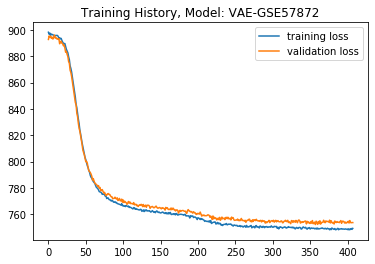

In [11]:
vae.plot_history()

In [13]:
from rna_autoencoder_test import plot_dimensionality_reduction
_, _, z = vae.encoder(X_scaled)
df = pd.DataFrame(np.c_[tumor_ids, z, X.index], columns=['tumor_ids', 'z1', 'z2', 'cell'])
plot_dimensionality_reduction(df, x='z1', y='z2', title='t-cells expression')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Loading BokehJS ...

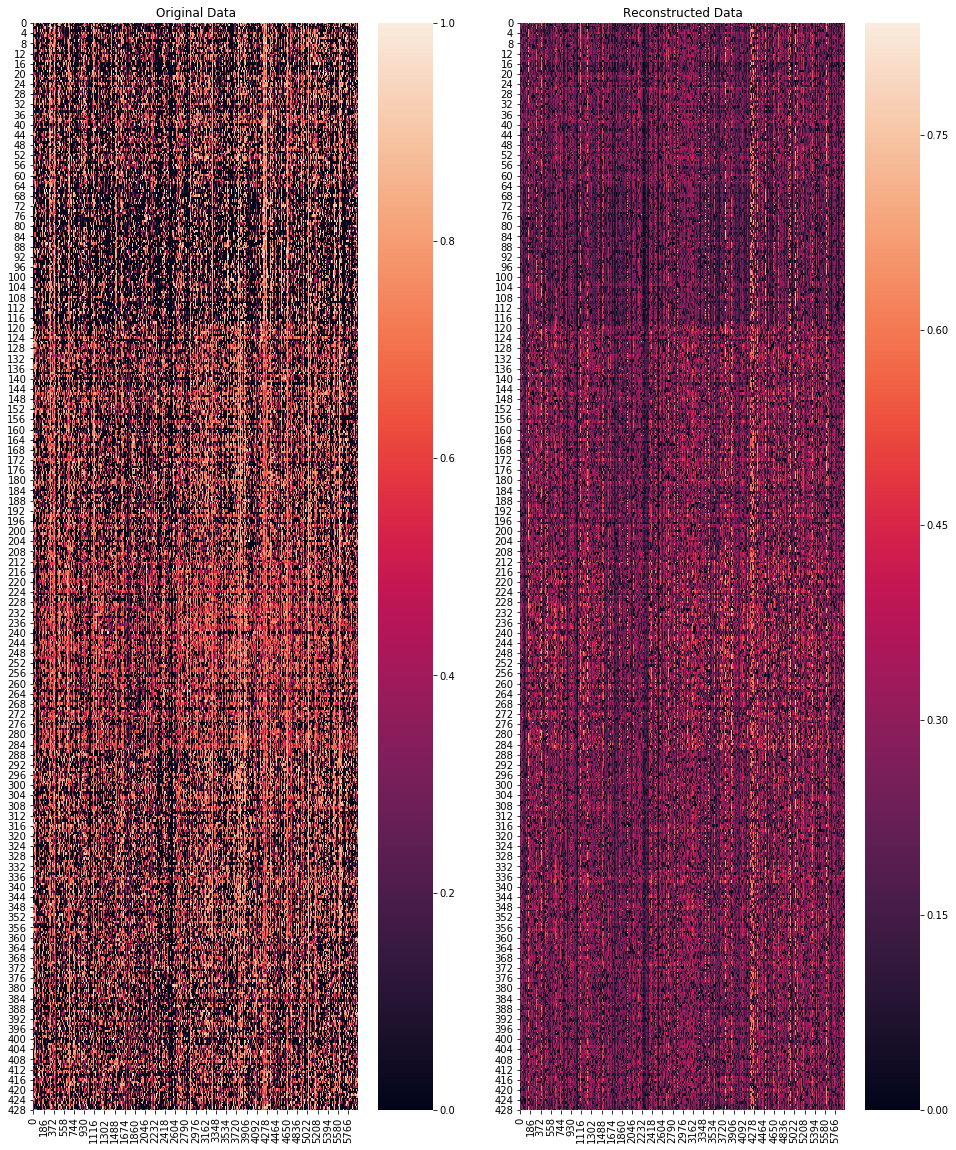

In [14]:
vae.plot_reconstructions(X_scaled,figsize=(16, 20))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



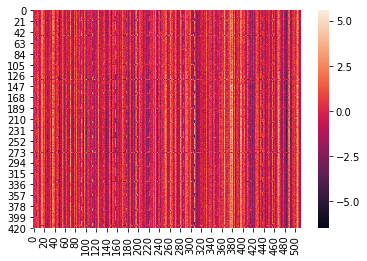

In [8]:
x = vae.encoder.dropout(X_scaled)
x = vae.encoder.dense1(x)
#x = vae.encoder.dense2(x)
#x = vae.encoder.dense3(x)
#z_mean, z_logvar = vae.encoder.variational(x)
sns.heatmap(x)

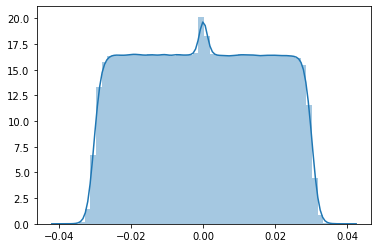

In [9]:
sns.distplot(vae.encoder.dense1.kernel.numpy().flatten())

## Change Architecture

In [20]:
import tensorflow as tf
from tensorflow.keras.losses import mse
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from rna_autoencoder_test import VariationalLayer, SamplingLayer, ZeroInflatedLayer

In [45]:
m, n = X_scaled.shape

# encoder
encoder_inputs = Input(shape=(n,), name='decoder-input')
x = Dense(512, activation='relu', name='decoder-dense1')(encoder_inputs)
#x = Dense(512, activation='relu', name='decoder-dense2')(x)
#x = Dense(64, activation='relu', name='decoder-dense3')(x)
z_mean, z_logvar = VariationalLayer(2)(x)
z = SamplingLayer()([z_mean, z_logvar])

# decoder
decoder_inputs = Input(shape=(2,))
x = Dense(512, activation='relu')(decoder_inputs)
#x = Dense(512, activation='relu')(x)
#x = Dense(1024, activation='relu')(x)
x = Dense(n, activation='sigmoid')(x)
outputs = ZeroInflatedLayer()(x)
encoder = Model(encoder_inputs, z)
decoder = Model(decoder_inputs, outputs)

vae_outputs = decoder(encoder(encoder_inputs))
vae = Model(encoder_inputs, vae_outputs)


reconstruction_loss = n * mse(encoder_inputs, vae_outputs)
kl_loss = -0.5 * tf.reduce_mean(z_logvar - tf.square(z_mean) - tf.exp(z_logvar) + 1)
vae.add_loss(tf.reduce_mean(reconstruction_loss + 0.2 * kl_loss))

In [46]:
def loss(y_true, y_train):
    return 0.

early_stopping = EarlyStopping(patience=50)
vae.compile(optimizer=Adam(0.001), loss=loss)

vae.fit(X_train, X_train,
        validation_data=(X_test, X_test),
        epochs=10000,
        batch_size=256,
        callbacks=[early_stopping])

Train on 322 samples, validate on 108 samples
Epoch 1/10000
322/322 [==============================] - 3s 8ms/sample - loss: 799.5551 - val_loss: 791.8130
Epoch 2/10000
322/322 [==============================] - 1s 2ms/sample - loss: 794.6476 - val_loss: 787.9854
Epoch 3/10000
322/322 [==============================] - 1s 2ms/sample - loss: 793.3047 - val_loss: 783.1298
Epoch 4/10000
322/322 [==============================] - 1s 2ms/sample - loss: 787.2357 - val_loss: 773.0696
Epoch 5/10000
322/322 [==============================] - 1s 2ms/sample - loss: 777.7018 - val_loss: 765.6078
Epoch 6/10000
322/322 [==============================] - 1s 2ms/sample - loss: 769.1245 - val_loss: 754.1920
Epoch 7/10000
322/322 [==============================] - 1s 2ms/sample - loss: 758.6797 - val_loss: 743.5651
Epoch 8/10000
322/322 [==============================] - 1s 2ms/sample - loss: 747.3028 - val_loss: 734.5308
Epoch 9/10000
322/322 [==============================] - 1s 2ms/sample - loss: 737

322/322 [==============================] - 1s 2ms/sample - loss: 654.3693 - val_loss: 656.7094
Epoch 150/10000
322/322 [==============================] - 1s 2ms/sample - loss: 654.0342 - val_loss: 658.1081
Epoch 151/10000
322/322 [==============================] - 1s 2ms/sample - loss: 654.2062 - val_loss: 659.0096
Epoch 152/10000
322/322 [==============================] - 1s 2ms/sample - loss: 654.1299 - val_loss: 658.2102
Epoch 153/10000
322/322 [==============================] - 1s 2ms/sample - loss: 653.9851 - val_loss: 657.3835
Epoch 154/10000
322/322 [==============================] - 1s 2ms/sample - loss: 653.8546 - val_loss: 657.8147
Epoch 155/10000
322/322 [==============================] - 1s 2ms/sample - loss: 654.2671 - val_loss: 657.9575
Epoch 156/10000
322/322 [==============================] - 1s 2ms/sample - loss: 653.8477 - val_loss: 657.4207
Epoch 157/10000
322/322 [==============================] - 1s 2ms/sample - loss: 654.4666 - val_loss: 658.3655
Epoch 158/10000
3

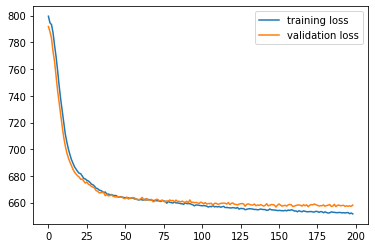

In [49]:
plt.plot(vae.history.history['loss'], label='training loss')
plt.plot(vae.history.history['val_loss'], label='validation loss')
plt.legend()

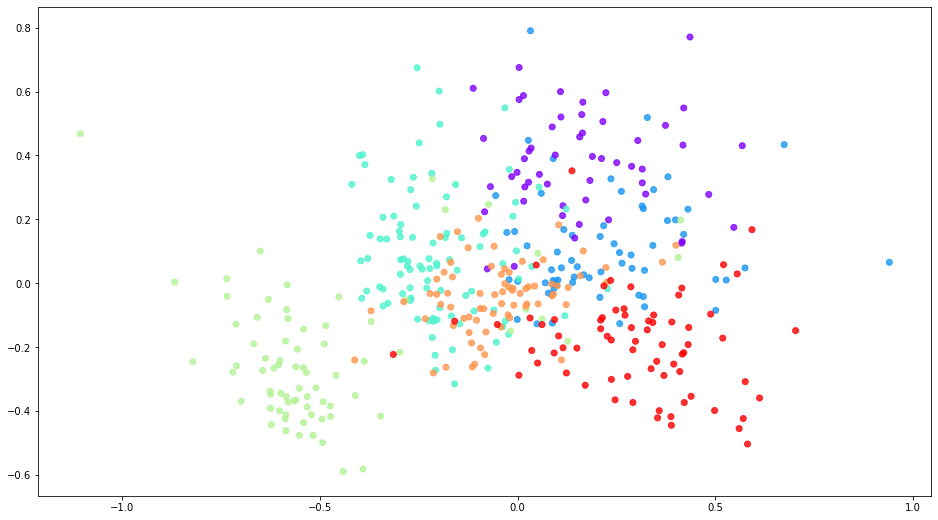

In [50]:
z = encoder(X_scaled)
plt.figure(figsize=(16, 9))
plt.scatter(z[:, 0], z[:, 1], c=tumor_ids, alpha=0.8, cmap='rainbow')

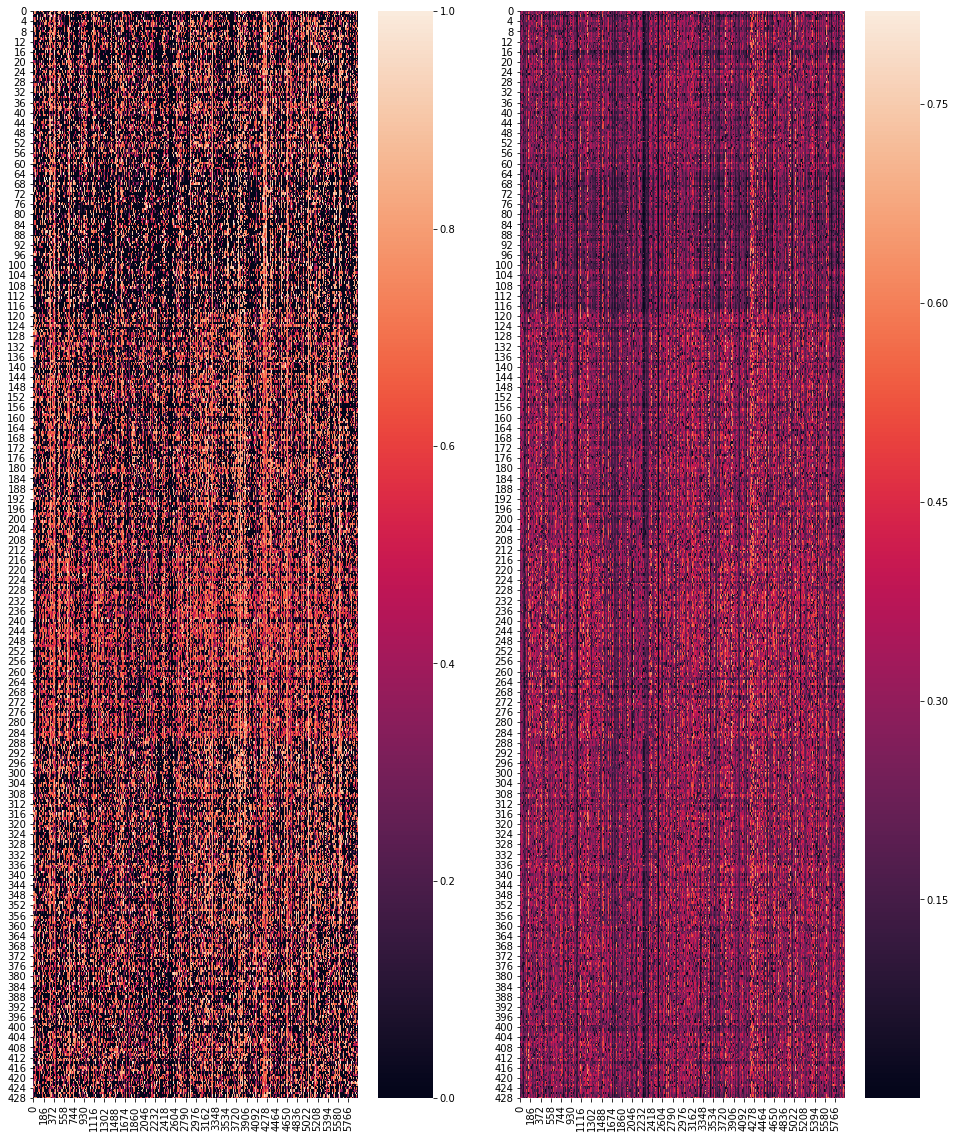

In [51]:
reconstructions = vae.predict(X_scaled)

fig, ax = plt.subplots(1, 2, figsize=(16, 20))

sns.heatmap(X_scaled, ax=ax[0])
sns.heatmap(reconstructions, ax=ax[1])

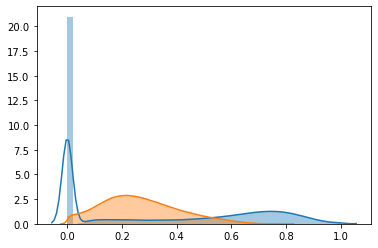

In [34]:
sns.distplot(X_scaled.flatten())
sns.distplot(reconstructions.flatten())